# Refactored Simstock demo session

---

## Plan

1) Quick into to code
2) Installation guide
3) Demo 1: simple test data
4) Demo 2: larger geopackage data
5) Demo 3: geopackage data with missing fields
6) Discussion

---

## Quick overview and basic usage 

Simstock broadly does two things: preprocesses data, and then saves it to an idf file. The refactoring has seperated these two actions into two base objects: the ``SimstockDataframe`` and the ``IDFmanager``. Basic workflow:

In [1]:
import simstock as sim

# Read in data
sdf = sim.read_csv("tests/data/test_data.csv")
# print(sdf)

# Adjust settings if needed:
# sdf.settings.printidf()
print(sdf.materials[0])

# # Process it
# sdf.preprocessing()

# # Create simulation IDF
# simulation = sim.IDFmanager(sdf)
# simulation.create_model_idf()

# # Have a look at it
# simulation.idf.printidf()


MATERIAL,
    10mm_carpet,              !- Name
    Rough,                    !- Roughness
    0.01,                     !- Thickness
    0.058,                    !- Conductivity
    20,                       !- Density
    1000,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.5,                      !- Solar Absorptance
    0.5;                      !- Visible Absorptance



## Installation

This will change! 

For now, install poetry. 

Then:

- Clone from github
- Run poetry install

---

## First demo

- Create a file script.py in your directory.
- Read in data:

In [2]:
import simstock as sim

sdf = sim.read_csv("tests/data/test_data.csv")
print(sdf)

                                              polygon                  osgb  \
0   POLYGON ((528883.55 186137, 528878.05 186145.5...     osgb1000005307038   
1   POLYGON ((528890.484 186151.245, 528890.478 18...     osgb1000005307037   
2   POLYGON ((528858.2 186118.45, 528851.7 186128....     osgb1000005307041   
3   POLYGON ((528832.1 186116.3, 528826.7 186112.9...     osgb1000005307012   
4   POLYGON ((528834.5 186034.9, 528839.7 186038.2...     osgb1000005306985   
5   POLYGON ((528824.95 186038.85, 528821.85 18603...     osgb1000005306983   
6   POLYGON ((528897 186145.55, 528906.2 186151.4,...     osgb1000005306850   
7   POLYGON ((528867.772 186138.056, 528867.767 18...     osgb1000005307039   
8   POLYGON ((528850.15 186169.8, 528851.3 186167....     osgb1000005307033   
9   POLYGON ((528868.941 186176.782, 528868.935 18...     osgb1000005307034   
10  POLYGON ((528864.175 186120.697, 528863.4 1861...     osgb1000005307040   
11  POLYGON ((528846.1 186125.35, 528840.5 186121...

Play around with it:

- Plot
- Access fields


In [3]:
print(sdf['osgb'])

0        osgb1000005307038
1        osgb1000005307037
2        osgb1000005307041
3        osgb1000005307012
4        osgb1000005306985
5        osgb1000005306983
6        osgb1000005306850
7        osgb1000005307039
8        osgb1000005307033
9        osgb1000005307034
10       osgb1000005307040
11       osgb1000005307042
12       osgb1000005307043
13       osgb1000005307011
14       osgb1000005306986
15       osgb1000005306982
16       osgb1000005306984
17    osgb5000005160060964
Name: osgb, dtype: object


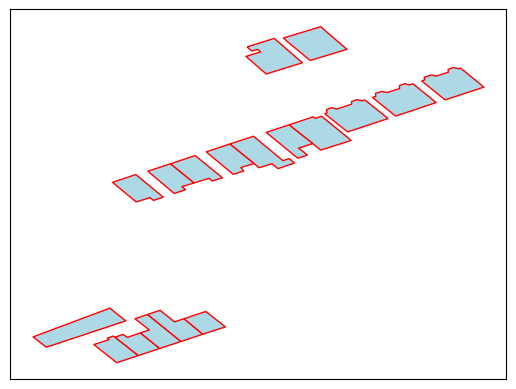

In [16]:
import matplotlib.pyplot as plt

sim.plot(sdf, facecolor="lightblue", edgecolor="red")
plt.show()

In [5]:
print(sdf.schedules)

[
Schedule:Compact,
    Dwell_Heat_Off,           !- Name
    Temperature,              !- Schedule Type Limits Name
    Through: 12/31,           !- Field 1
    For: AllDays,             !- Field 2
    Until 24:00,              !- Field 3
    0;                        !- Field 4
, 
Schedule:Compact,
    Dwell_Cool_Off,           !- Name
    Temperature,              !- Schedule Type Limits Name
    Through: 12/31,           !- Field 1
    For: AllDays,             !- Field 2
    Until 24:00,              !- Field 3
    80;                       !- Field 4
, 
Schedule:Compact,
    Activity Schedule 98779,    !- Name
    Any Number,               !- Schedule Type Limits Name
    Through: 12/31,           !- Field 1
    For: AllDays,             !- Field 2
    Until: 24:00,             !- Field 3
    108;                      !- Field 4
, 
Schedule:Compact,
    Clothing Schedule 98779,    !- Name
    Any Number,               !- Schedule Type Limits Name
    Through: 4/1,             !- 

In [6]:
sdf.settings.printidf()


Version,
    8.9;                      !- Version Identifier

SimulationControl,
    No,                       !- Do Zone Sizing Calculation
    No,                       !- Do System Sizing Calculation
    No,                       !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    building,                 !- Name
    0,                        !- North Axis
    City,                     !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    AverageOverDaysInFrequency,    !- Calculation Method
    20,                       !- Calculation Frequency
    150

The ``SimstockDataframe`` can be accessed in the same manner as a Pandas dataframe. E.g.

In [7]:
print(sdf.loc[sdf["osgb"] == "osgb1000005307038", "polygon"])

0    POLYGON ((528883.55 186137, 528878.05 186145.5...
Name: polygon, dtype: object


In [8]:
print(sdf.columns)

Index(['polygon', 'osgb', 'shading', 'height', 'wwr', 'nofloors',
       'construction'],
      dtype='object')


- Now do some processing (see what error occurs):

In [9]:
# Create simulation IDF
simulation = sim.IDFmanager(sdf)
simulation.create_model_idf()

# Have a look at it
simulation.idf.printidf()

SimstockException: Error: the following columns are missing from the data: 
['touching', 'interiors', 'polygon_exposed_wall', 'polygon_horizontal'] 
Please pre-process the data accordingly using Simstock.

In [ ]:
# Remember to pre-process
sdf.preprocessing()

# Create simulation IDF
simulation = sim.IDFmanager(sdf)
simulation.create_model_idf()
simulation.save_idfs("file_path")
simulation.run() 

# Have a look at it
simulation.idf.printidf()

The BI(s) with the most buildings: ['bi_528830-15_186037-12'] with 2 thermally simulated buildings

SimulationControl,
    No,                       !- Do Zone Sizing Calculation
    No,                       !- Do System Sizing Calculation
    No,                       !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    building,                 !- Name
    0,                        !- North Axis
    City,                     !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    AverageOverDaysInFrequency,    !- Calculation Method
    20,                  

## Finer grained control 

In [ ]:
# Set kwargs
kwargs = {"tol" : 0.1}

# Read in data
sdf = sim.read_csv("tests/data/test_data.csv")
 
# Ensure exteriors and interiors are oriented correctly
sdf.orientate_polygons(**kwargs)

# Remove duplicate coordinates from polygons
sdf.remove_duplicate_coords(**kwargs)

# Check for polygons intersecting each other
sdf.polygon_topology(**kwargs)

# Assess which polygons need simplifying
sdf.polygon_tolerance(**kwargs)

# Simplify relevant polygons
sdf.polygon_simplification(**kwargs)

# Check again that polygons are not intersecting each other
sdf.polygon_topology(**kwargs)

# Remove collinear points, determine exterior surfaces coordinates
sdf.collinear_exterior(**kwargs)

# Final check that nothing is interecting after the above processing
# It pays to repeatedly check this
sdf.polygon_topology(**kwargs)

# Check for built islands
sdf.bi_adj()

# We now have proprocessed data ready to be turned into an IDF file
# To turn it into an IDF file, we can either call create_idf,
# or instantiate an IDFcreator object for finer grained control:
idfkwargs = {"min_avail_height" : 80}
ob = sim.IDFmanager(sdf)
 
# Move all objects towards origin
ob.move_towards_origin(**idfkwargs)

# Create shading objects
ob.create_shading_objects(**idfkwargs)
 
# Create thermal zones based on floor number
ob.create_thermal_zones(**idfkwargs)

# Compute ideal load systems
ob.create_load_systems(**idfkwargs)

# All relevant data for an E+ run have now been created
# The results can be saved to a file,
# Or kept as an eppy idf object for further processing:
ob.idf.printidf()

## Demo 2 

Using geopackage data, and build custom settings.

In [ ]:
import os

# Path to test data
s7data = os.path.join("tests", "data", "S7_data.gpkg")

# Layer names
layers = sim.get_gpkg_layer_names(s7data)
print(layers)

# Initialise
sdf = sim.read_geopackage_layer(s7data, "test_full", uid_column_name="UID", index="fid", use_base=True)

sim.plot(sdf)
plt.show()


Create custom csvs for inputting more settings:

In [ ]:
# Add option too specify absolute path
sdf.create_csv_folder(dirname="simulation_settings")

sdf.override_settings_with_csv()

sdf.preprocessing()

# print(sdf.columns)

# Create simulation IDF
simulation = sim.IDFmanager(sdf)
simulation.create_model_idf_with_bi()

# Have a look at it
simulation.idf.printidf()


## Demo 3

Incomplete data

In [ ]:
# Initialise
sdf = sim.read_geopackage_layer(s7data, "test_with_data", uid_column_name="id", index="fid", use_base=True)

## Try and populate data!

---

# Finale: discussion

- Opinions
- Further functionality
- Overriding functionality and best practices
- Hosting documentation
